# imports

In [29]:
import sys
sys.path.append('U:\\neuro_cl\\')
import utils
import os
from matplotlib import pyplot as plt
import numpy as np
from pprint import pprint
from behavior import load_sessions_data, get_sessions_with_offset
from utils.multisession_plotting_utils import plot_rolling_accuracy_multisession_concat, plot_max_accuracy_multisession, truncate_when_licks_stop

In [2]:
base_dir = r'E:\Unbiased\GluA2\Behavior data\preprocess_pilot_v1'
mice_nums = [24,26,27,28,29,30]
mice = {f'BM{num}': os.path.join(base_dir, f'BM{num}') for num in mice_nums}
mice

{'BM24': 'E:\\Unbiased\\GluA2\\Behavior data\\preprocess_pilot_v1\\BM24',
 'BM26': 'E:\\Unbiased\\GluA2\\Behavior data\\preprocess_pilot_v1\\BM26',
 'BM27': 'E:\\Unbiased\\GluA2\\Behavior data\\preprocess_pilot_v1\\BM27',
 'BM28': 'E:\\Unbiased\\GluA2\\Behavior data\\preprocess_pilot_v1\\BM28',
 'BM29': 'E:\\Unbiased\\GluA2\\Behavior data\\preprocess_pilot_v1\\BM29',
 'BM30': 'E:\\Unbiased\\GluA2\\Behavior data\\preprocess_pilot_v1\\BM30'}

In [9]:
# Example usage
start_offset = 0  # Start from the most recent date
num_days = 6  # Number of days
for name, directory in mice.items():
    print(name)
    sessions = get_sessions_with_offset(directory, start_offset, num_days)
    data = load_sessions_data(sessions, directory)
    fig, ax = plt.subplots(figsize=(14, 6))
    plot_rolling_accuracy_multisession_concat(data, name,window=20, ax=ax, truncate=True)
    plot_filename = os.path.join(base_dir, f'{name}_rolling_accuracy.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()
    fig, ax = plt.subplots(figsize=(14, 6))
    plot_max_accuracy_multisession(data, name, window=25, ax=ax)
    plot_filename = os.path.join(base_dir, f'{name}_max_accuracy.png')
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.close()


BM24


U:\neuro_cl\utils\multisession_plotting_utils.py:283: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1))


BM26


U:\neuro_cl\utils\multisession_plotting_utils.py:283: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1))


BM27


U:\neuro_cl\utils\multisession_plotting_utils.py:283: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1))


BM28


U:\neuro_cl\utils\multisession_plotting_utils.py:283: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1))


BM29


U:\neuro_cl\utils\multisession_plotting_utils.py:283: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1))


BM30


U:\neuro_cl\utils\multisession_plotting_utils.py:283: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1))


# Try to get a slope of learning

In [31]:
import numpy as np

start_offset = 0  # Start from the most recent date
num_days = 3  # Number of days

# Dictionary to store correct_all arrays for each animal
correct_all_dict = {}

for name, directory in mice.items():
    print(name)
    sessions = get_sessions_with_offset(directory, start_offset, num_days)
    data = load_sessions_data(sessions, directory)
    keys = sorted(data.keys())
    
    # Initialize an empty list to collect correct arrays for the current animal
    correct_all = []
    
    for key in keys:
        current = data[key]
        current2 = truncate_when_licks_stop(current, 10)
        correct = np.array(current2['lick_logged'] == current2['data.isRewarding'], dtype=np.int16)
        correct_all.append(correct)
    
    # Concatenate all correct arrays into one for the current animal
    correct_all = np.concatenate(correct_all)
    
    # Store the correct_all array in the dictionary
    correct_all_dict[name] = correct_all

# Display the correct_all dictionary
print(correct_all_dict)

BM24
BM26
BM27
BM28
BM29
BM30
{'BM24': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1,

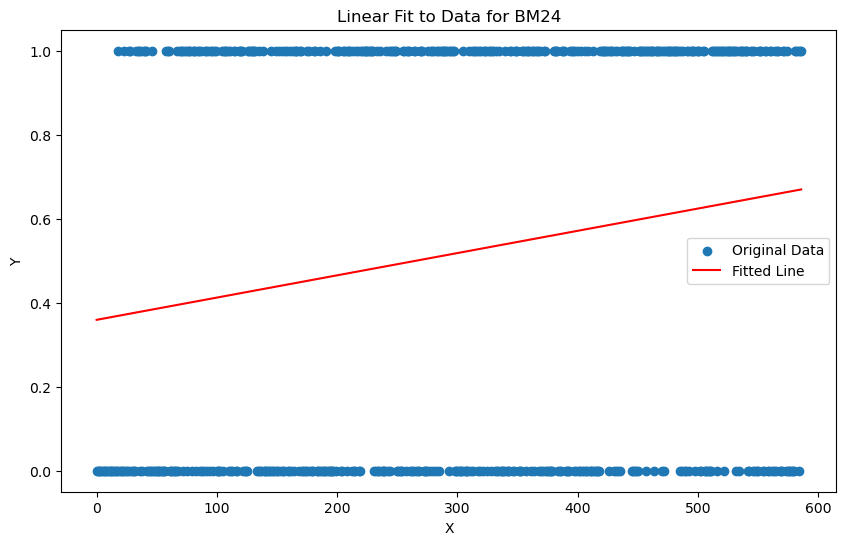

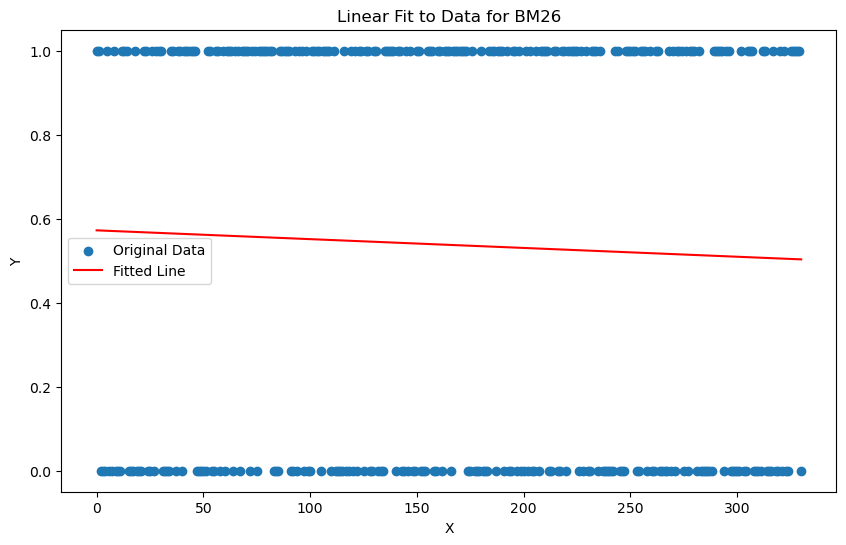

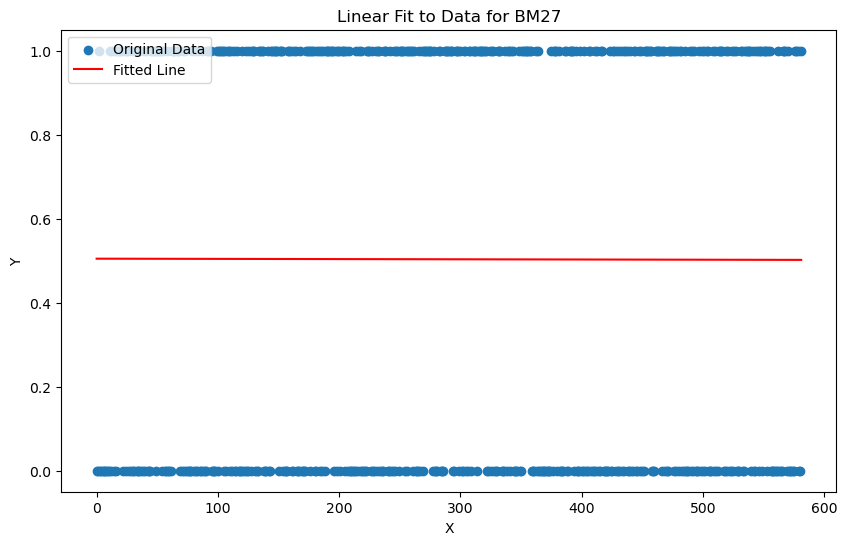

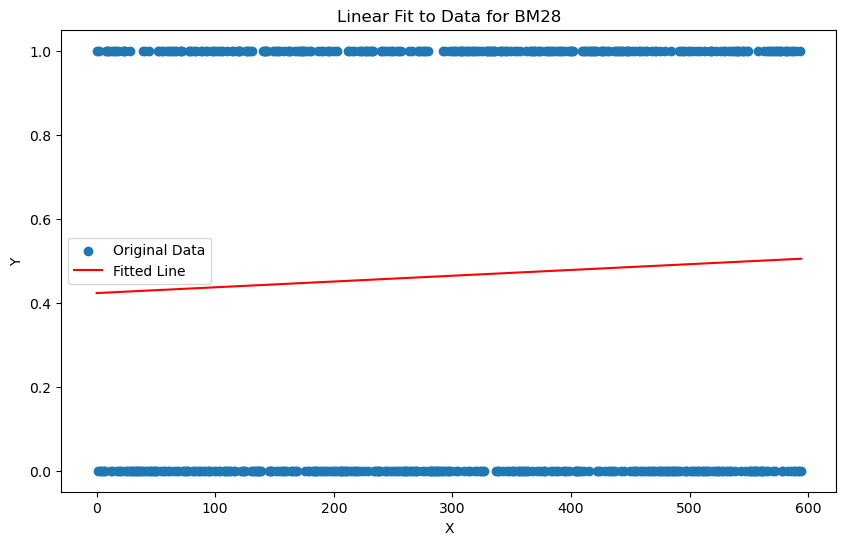

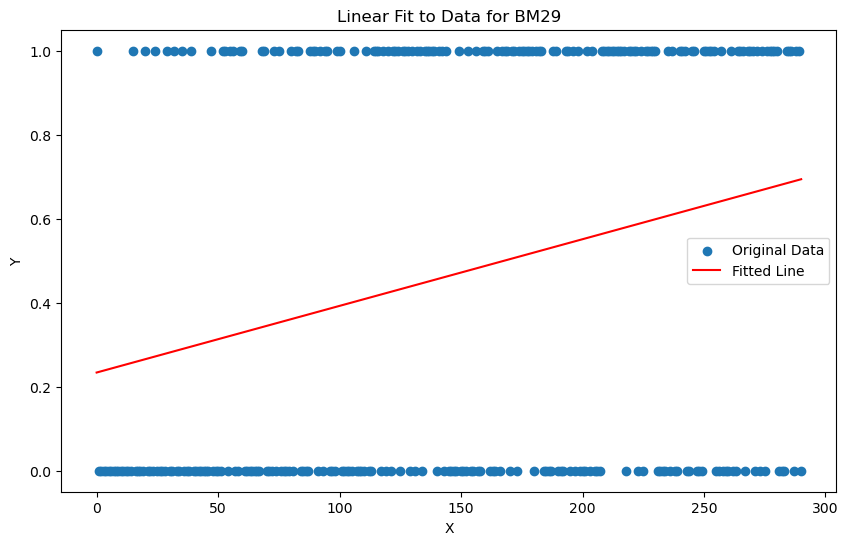

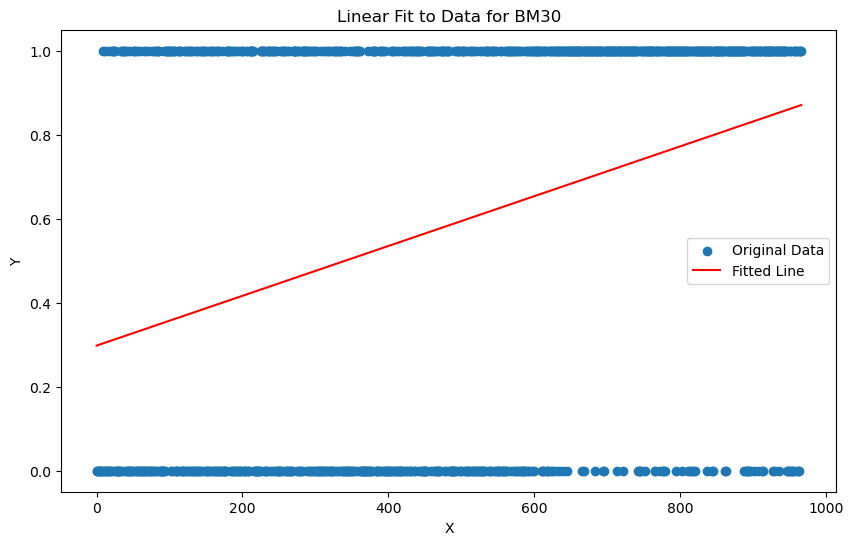

{'BM24': {'slope': np.float64(529.7500735384943), 'intercept': np.float64(0.3592636373118245)}, 'BM26': {'slope': np.float64(-209.46185180160404), 'intercept': np.float64(0.572325556000437)}, 'BM27': {'slope': np.float64(-4.961022343135988), 'intercept': np.float64(0.5048776031075195)}, 'BM28': {'slope': np.float64(137.69184712729893), 'intercept': np.float64(0.4229710676216797)}, 'BM29': {'slope': np.float64(1587.0542344983419), 'intercept': np.float64(0.2337946617709364)}, 'BM30': {'slope': np.float64(592.8402542354663), 'intercept': np.float64(0.29793943952071233)}}


In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to store the slope and intercept for each animal
fit_results = {}

for name, y in correct_all_dict.items():
    # Generate x values as the range of the length of y
    x = np.arange(len(y))
    
    # Fit a line to the data
    coefficients = np.polyfit(x, y, 1)
    slope, intercept = coefficients
    
    # Store the slope and intercept in the dictionary
    fit_results[name] = {'slope': slope*1000000, 'intercept': intercept}
    
    # Generate the fitted line
    fitted_line = slope * x + intercept
    
    # Plot the original data and the fitted line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, fitted_line, color='red', label='Fitted Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Linear Fit to Data for {name}')
    plt.legend()
    plt.show()

# Display the fit results
print(fit_results)

In [43]:
pprint(fit_results)

{'BM24': {'intercept': np.float64(0.3592636373118245),
          'slope': np.float64(529.7500735384943)},
 'BM26': {'intercept': np.float64(0.572325556000437),
          'slope': np.float64(-209.46185180160404)},
 'BM27': {'intercept': np.float64(0.5048776031075195),
          'slope': np.float64(-4.961022343135988)},
 'BM28': {'intercept': np.float64(0.4229710676216797),
          'slope': np.float64(137.69184712729893)},
 'BM29': {'intercept': np.float64(0.2337946617709364),
          'slope': np.float64(1587.0542344983419)},
 'BM30': {'intercept': np.float64(0.29793943952071233),
          'slope': np.float64(592.8402542354663)}}


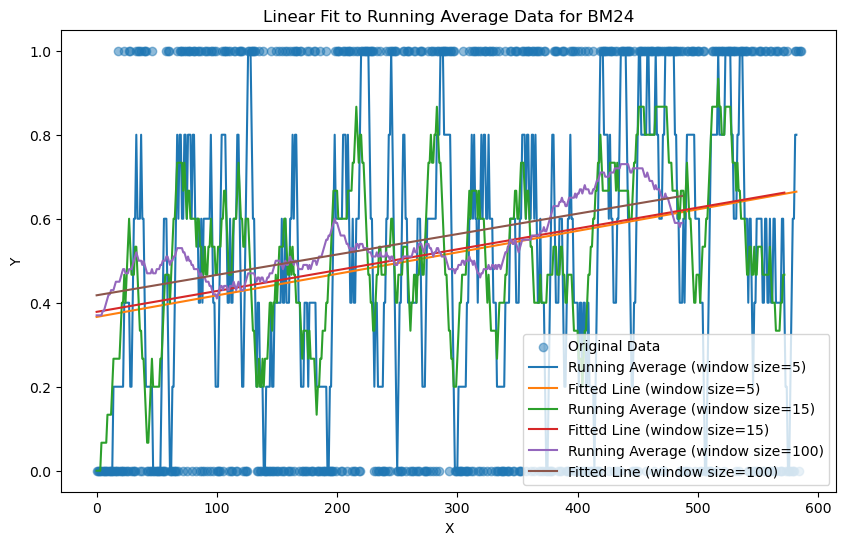

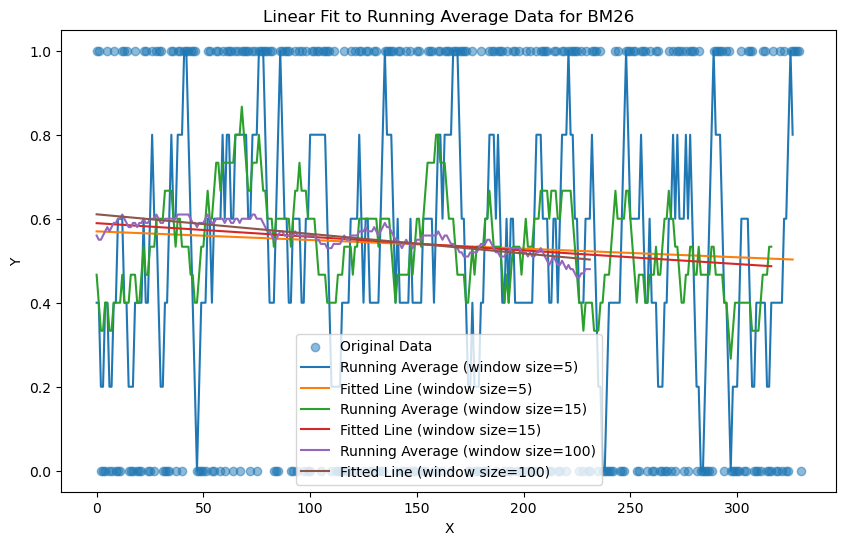

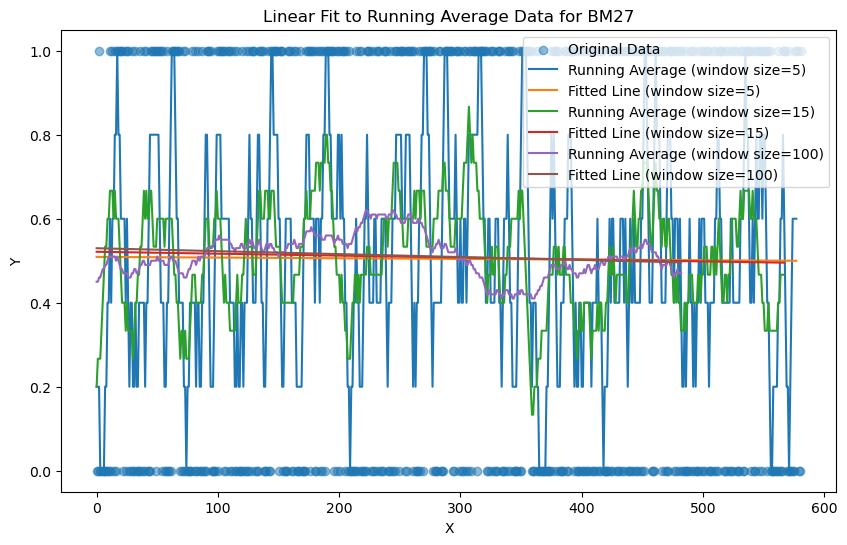

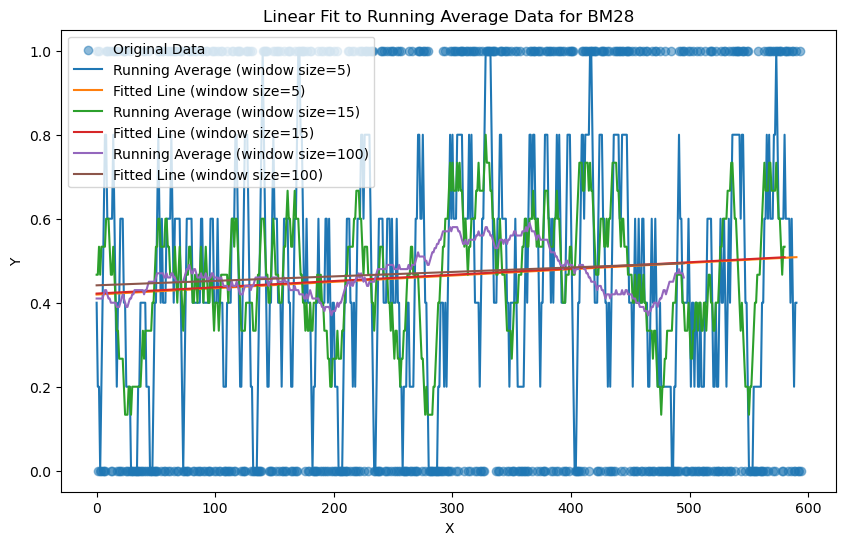

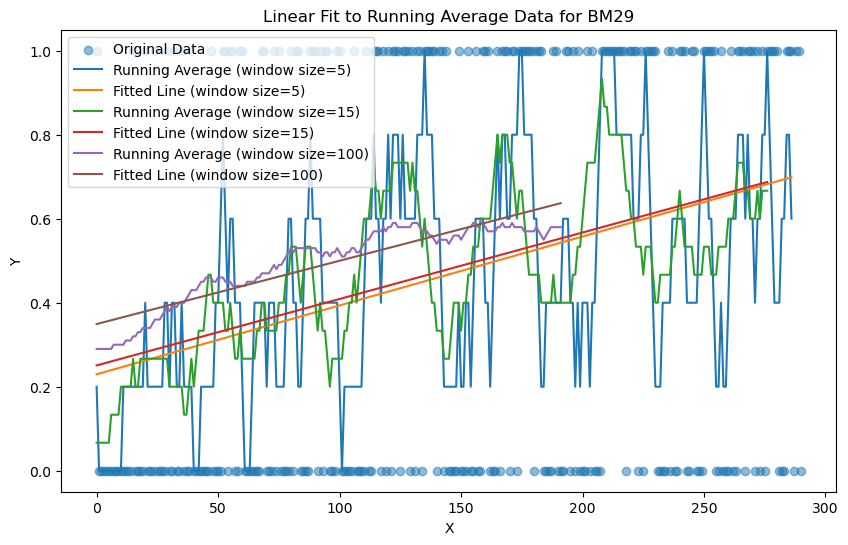

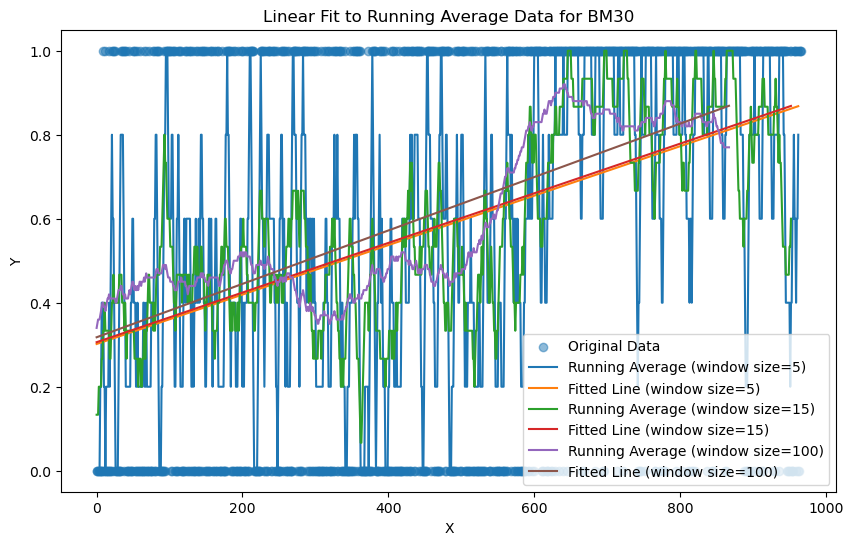

{'BM24': {'window_size_5': {'slope_running_avg': np.float64(0.0005123269745844644), 'intercept_running_avg': np.float64(0.3661787166051833)}, 'window_size_15': {'slope_running_avg': np.float64(0.0004962304540902416), 'intercept_running_avg': np.float64(0.3782642448713195)}, 'window_size_100': {'slope_running_avg': np.float64(0.00048562948436477974), 'intercept_running_avg': np.float64(0.41769184350799576)}}, 'BM26': {'window_size_5': {'slope_running_avg': np.float64(-0.00020564296372968803), 'intercept_running_avg': np.float64(0.5699112403968074)}, 'window_size_15': {'slope_running_avg': np.float64(-0.00032432266815542697), 'intercept_running_avg': np.float64(0.589413328571712)}, 'window_size_100': {'slope_running_avg': np.float64(-0.0004662456826878905), 'intercept_running_avg': np.float64(0.61053241083321)}}, 'BM27': {'window_size_5': {'slope_running_avg': np.float64(-1.5921286452374135e-05), 'intercept_running_avg': np.float64(0.5090915610377038)}, 'window_size_15': {'slope_running_

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def running_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Dictionary to store the fit results for each animal and window size
fit_results = {}

# Define the window sizes for the running average
window_sizes = [5, 15, 100]

for name, y in correct_all_dict.items():
    # Generate x values as the range of the length of y
    x = np.arange(len(y))
    
    # Initialize a dictionary to store the fit results for the current animal
    fit_results[name] = {}
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Original Data', alpha=0.5)
    
    for window_size in window_sizes:
        # Calculate the running average of y
        y_running_avg = running_average(y, window_size)
        x_running_avg = np.arange(len(y_running_avg))
        
        # Fit a line with intercept to the running average
        coefficients_running_avg = np.polyfit(x_running_avg, y_running_avg, 1)
        slope_running_avg, intercept_running_avg = coefficients_running_avg
        
        # Store the slope and intercept of the running average fit in the dictionary
        fit_results[name][f'window_size_{window_size}'] = {
            'slope_running_avg': slope_running_avg,
            'intercept_running_avg': intercept_running_avg
        }
        
        # Generate the fitted line for the running average
        fitted_line_running_avg = slope_running_avg * x_running_avg + intercept_running_avg
        
        # Plot the running average and the fitted line for the running average
        plt.plot(x_running_avg, y_running_avg, label=f'Running Average (window size={window_size})')
        plt.plot(x_running_avg, fitted_line_running_avg, label=f'Fitted Line (window size={window_size})')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Linear Fit to Running Average Data for {name}')
    plt.legend()
    plt.show()

# Display the fit results
print(fit_results)

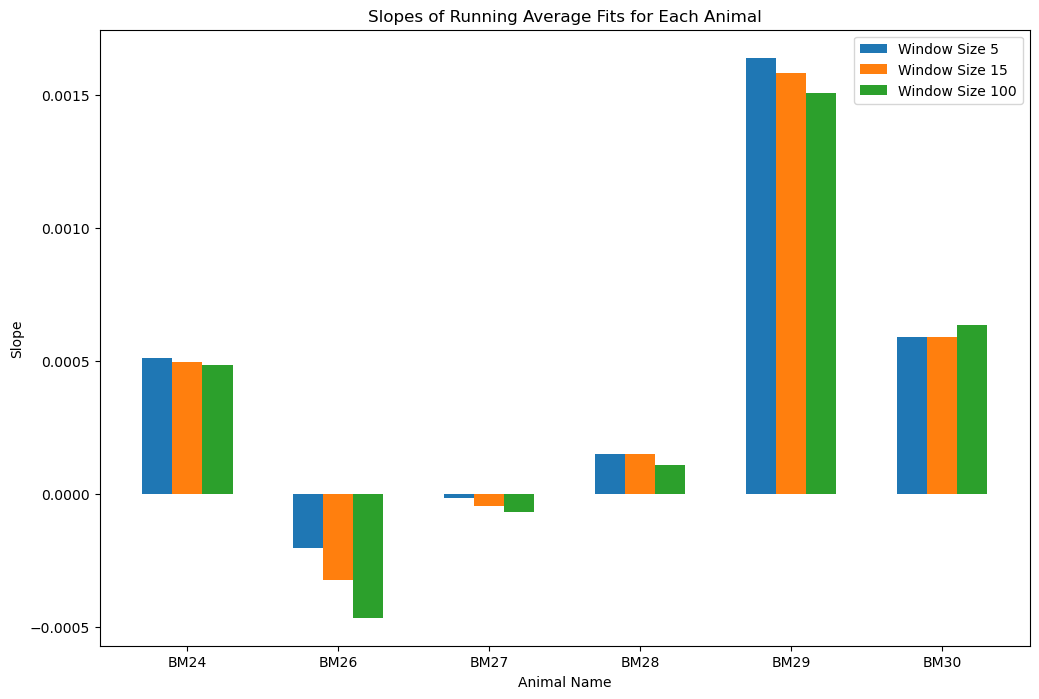

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))

# Define the bar width and positions
bar_width = 0.2
positions = np.arange(len(fit_results))

# Plot bars for each window size
for i, window_size in enumerate(window_sizes):
    slopes = [fit_results[name][f'window_size_{window_size}']['slope_running_avg'] for name in fit_results]
    ax.bar(positions + i * bar_width, slopes, bar_width, label=f'Window Size {window_size}')

# Set the x-axis labels and title
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(fit_results.keys())
ax.set_xlabel('Animal Name')
ax.set_ylabel('Slope')
ax.set_title('Slopes of Running Average Fits for Each Animal')
ax.legend()

# Show the plot
plt.show()

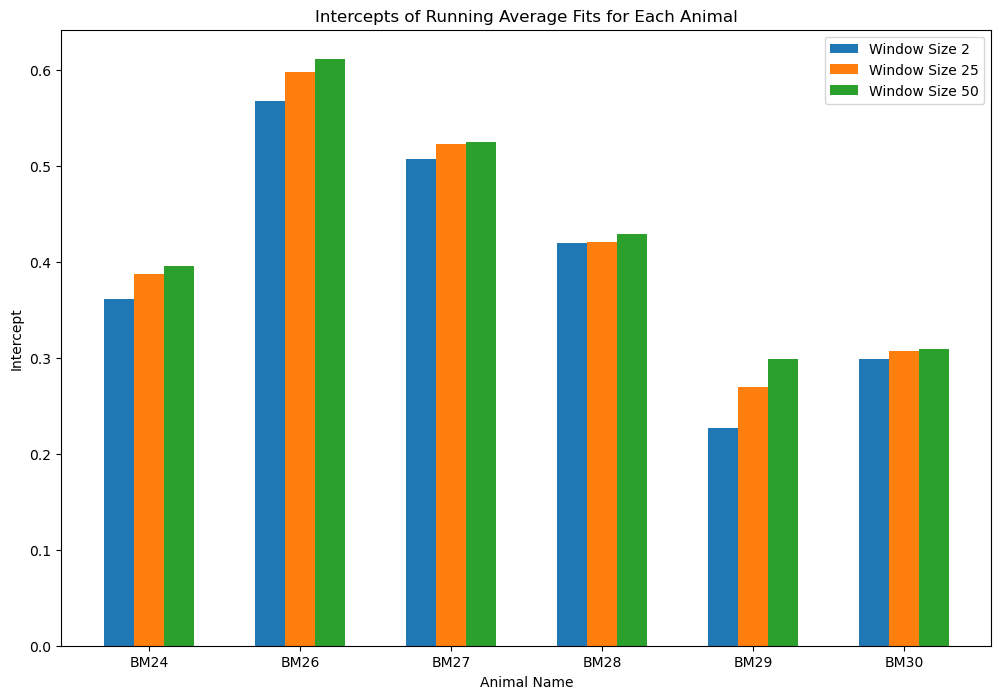

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))

# Define the bar width and positions
bar_width = 0.2
positions = np.arange(len(fit_results))

# Plot bars for each window size
for i, window_size in enumerate(window_sizes):
    intercepts = [fit_results[name][f'window_size_{window_size}']['intercept_running_avg'] for name in fit_results]
    ax.bar(positions + i * bar_width, intercepts, bar_width, label=f'Window Size {window_size}')

# Set the x-axis labels and title
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(fit_results.keys())
ax.set_xlabel('Animal Name')
ax.set_ylabel('Intercept')
ax.set_title('Intercepts of Running Average Fits for Each Animal')
ax.legend()

# Show the plot
plt.show()

   animal  window_size  slope_running_avg  intercept_running_avg  \
0    BM24            1           0.000530               0.359264   
1    BM24            3           0.000518               0.363385   
2    BM24            9           0.000498               0.372555   
3    BM24           27           0.000489               0.389293   
4    BM26            1          -0.000209               0.572326   
5    BM26            3          -0.000176               0.565865   
6    BM26            9          -0.000270               0.579826   
7    BM26           27          -0.000373               0.600307   
8    BM27            1          -0.000005               0.504878   
9    BM27            3          -0.000017               0.508928   
10   BM27            9          -0.000034               0.515096   
11   BM27           27          -0.000042               0.521878   
12   BM28            1           0.000138               0.422971   
13   BM28            3           0.000145       

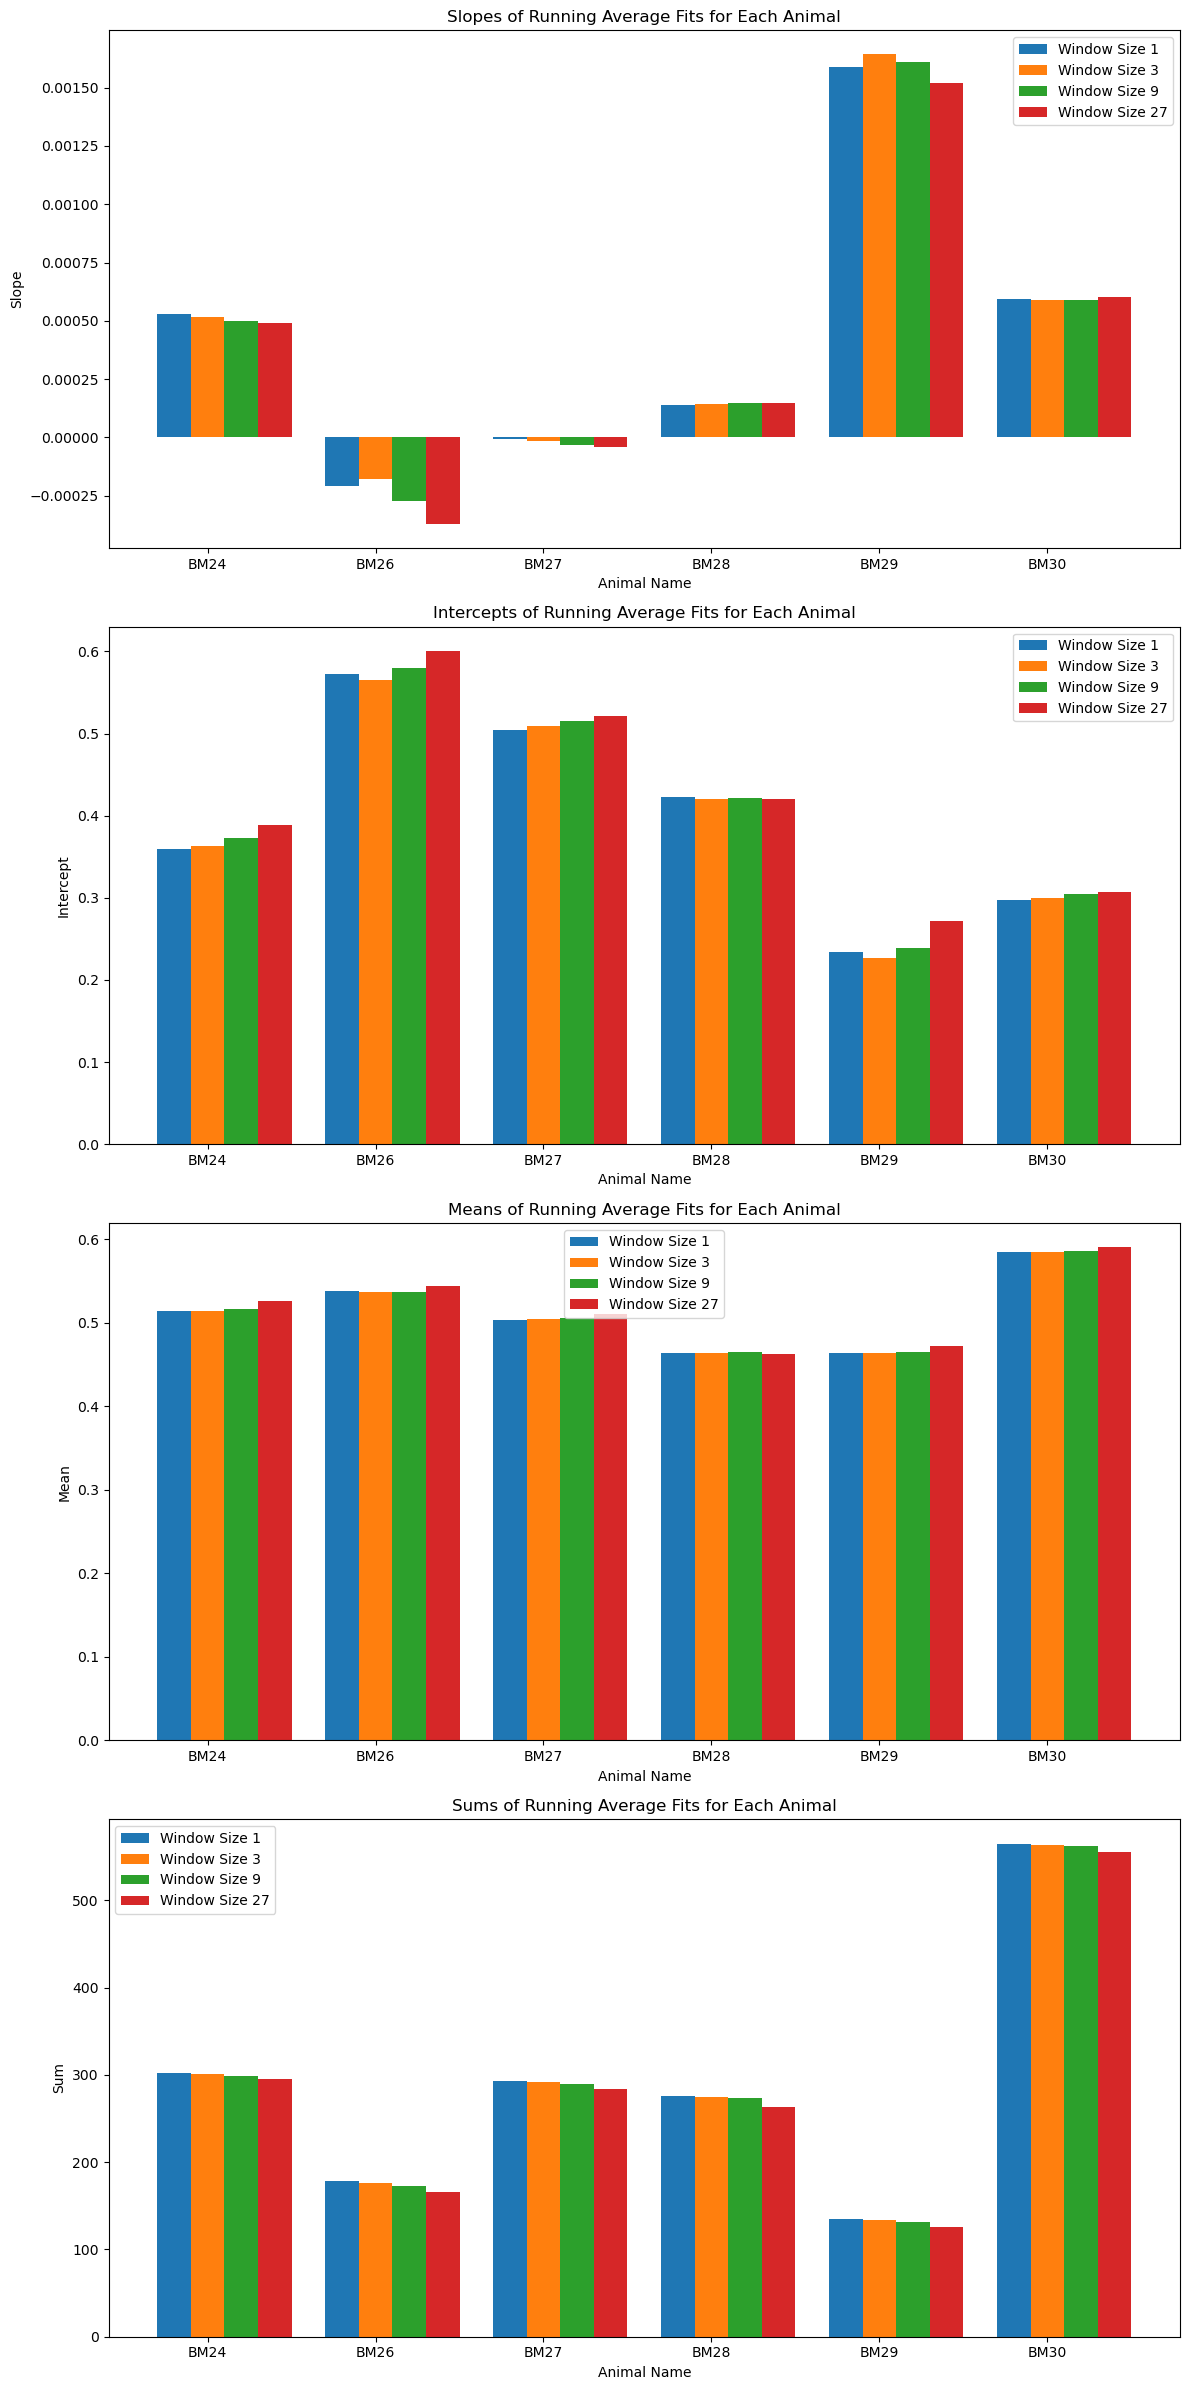

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def running_average(data, window_size):
    if window_size == 1:
        return data
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# List to store the fit results for each animal and window size
fit_results = []

# Define the window sizes for the running average, including 1
window_sizes = [1, 3, 9, 27]

for name, y in correct_all_dict.items():
    # Generate x values as the range of the length of y
    x = np.arange(len(y))
    
    for window_size in window_sizes:
        # Calculate the running average of y
        y_running_avg = running_average(y, window_size)
        x_running_avg = np.arange(len(y_running_avg))
        
        # Fit a line with intercept to the running average
        coefficients_running_avg = np.polyfit(x_running_avg, y_running_avg, 1)
        slope_running_avg, intercept_running_avg = coefficients_running_avg
        
        # Calculate the mean of the running average values
        mean_running_avg = np.mean(y_running_avg)
        
        # Calculate the sum of the running average values
        sum_running_avg = np.sum(y_running_avg)
        
        # Store the results in the list
        fit_results.append({
            'animal': name,
            'window_size': window_size,
            'slope_running_avg': slope_running_avg,
            'intercept_running_avg': intercept_running_avg,
            'mean_running_avg': mean_running_avg,
            'sum_running_avg': sum_running_avg
        })

# Convert the results to a DataFrame
fit_results_df = pd.DataFrame(fit_results)

# Display the DataFrame
print(fit_results_df)

# Create bar plots of the slopes, intercepts, means, and sums for each animal and window size
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# Define the bar width and positions
bar_width = 0.2
positions = np.arange(len(fit_results_df['animal'].unique()))

# Plot bars for each window size for slopes
for i, window_size in enumerate(window_sizes):
    slopes = fit_results_df[fit_results_df['window_size'] == window_size]['slope_running_avg']
    axes[0].bar(positions + i * bar_width, slopes, bar_width, label=f'Window Size {window_size}')

# Set the x-axis labels and title for slopes
axes[0].set_xticks(positions + bar_width)
axes[0].set_xticklabels(fit_results_df['animal'].unique())
axes[0].set_xlabel('Animal Name')
axes[0].set_ylabel('Slope')
axes[0].set_title('Slopes of Running Average Fits for Each Animal')
axes[0].legend()

# Plot bars for each window size for intercepts
for i, window_size in enumerate(window_sizes):
    intercepts = fit_results_df[fit_results_df['window_size'] == window_size]['intercept_running_avg']
    axes[1].bar(positions + i * bar_width, intercepts, bar_width, label=f'Window Size {window_size}')

# Set the x-axis labels and title for intercepts
axes[1].set_xticks(positions + bar_width)
axes[1].set_xticklabels(fit_results_df['animal'].unique())
axes[1].set_xlabel('Animal Name')
axes[1].set_ylabel('Intercept')
axes[1].set_title('Intercepts of Running Average Fits for Each Animal')
axes[1].legend()

# Plot bars for each window size for means
for i, window_size in enumerate(window_sizes):
    means = fit_results_df[fit_results_df['window_size'] == window_size]['mean_running_avg']
    axes[2].bar(positions + i * bar_width, means, bar_width, label=f'Window Size {window_size}')

# Set the x-axis labels and title for means
axes[2].set_xticks(positions + bar_width)
axes[2].set_xticklabels(fit_results_df['animal'].unique())
axes[2].set_xlabel('Animal Name')
axes[2].set_ylabel('Mean')
axes[2].set_title('Means of Running Average Fits for Each Animal')
axes[2].legend()

# Plot bars for each window size for sums
for i, window_size in enumerate(window_sizes):
    sums = fit_results_df[fit_results_df['window_size'] == window_size]['sum_running_avg']
    axes[3].bar(positions + i * bar_width, sums, bar_width, label=f'Window Size {window_size}')

# Set the x-axis labels and title for sums
axes[3].set_xticks(positions + bar_width)
axes[3].set_xticklabels(fit_results_df['animal'].unique())
axes[3].set_xlabel('Animal Name')
axes[3].set_ylabel('Sum')
axes[3].set_title('Sums of Running Average Fits for Each Animal')
axes[3].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [68]:
fit_results_df.to_csv(os.path.join(base_dir, 'fit_results.csv'), index=False)

In [69]:
import pandas as pd

# Load the DataFrame from the CSV file
fit_results_df2 = pd.read_csv(os.path.join(base_dir, 'fit_results.csv'))
fit_results_df2

,animal,window_size,slope_running_avg,intercept_running_avg,mean_running_avg,sum_running_avg
0,BM24,1,0.000530,0.359264,0.514480,302.000000
1,BM24,3,0.000518,0.363385,0.514530,301.000000
2,BM24,9,0.000498,0.372555,0.516408,299.000000
3,BM24,27,0.000489,0.389293,0.526243,295.222222
4,BM26,1,-0.000209,0.572326,0.537764,178.000000
5,BM26,3,-0.000176,0.565865,0.536981,176.666667
6,BM26,9,-0.000270,0.579826,0.536292,173.222222
7,BM26,27,-0.000373,0.600307,0.543655,165.814815
8,BM27,1,-0.000005,0.504878,0.503436,293.000000
9,BM27,3,-0.000017,0.508928,0.504023,292.333333


# Correlate with turnvoer

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import itk
code = os.path.abspath('../')
sys.path.append(code)
import src
from src.DELAT_utils import collect_region_stats_paths
import matplotlib.pyplot as plt
from src.analysis import *
from sklearn.linear_model import LinearRegression
from tifffile import imread, imwrite
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import linregress
import datetime


In [2]:

fit_resutls_path = '../paramaters/fit_results_reversal.csv'
# Load the DataFrame from the CSV file
fit_results_df = pd.read_csv(fit_resutls_path)
fit_results_df = fit_results_df[fit_results_df['window_size'] == 1]
fit_results_df = fit_results_df.reset_index(drop=True)
fit_results_df

,animal,window_size,slope_running_avg,intercept_running_avg,mean_running_avg,sum_running_avg
0,BM24,1,0.000530,0.359264,0.514480,302.0
1,BM26,1,-0.000209,0.572326,0.537764,178.0
2,BM27,1,-0.000005,0.504878,0.503436,293.0
3,BM28,1,0.000138,0.422971,0.463866,276.0
4,BM29,1,0.001587,0.233795,0.463918,135.0
5,BM30,1,0.000593,0.297939,0.584281,565.0


In [3]:
base_path = '/nrs/spruston/Boaz/I2'
# base_path = r'X:\Boaz\I2'
meta = pd.read_excel(os.path.join(code, 'paramaters','metadata.xlsx'), 'Metadata', index_col=0)
csv_paths = collect_region_stats_paths(base_path)
region_data = load_region_data(csv_paths)
slope = 1.4247
intercept = 202.8271

Data Validation extension is not supported and will be removed


In [4]:
filtered_meta = meta[(meta['Group'] == 'Reversal') & (meta['Path'].str.startswith('/nrs/'))]
filtered_meta

,Cage,AnimalID,Genotype,Pulse,Chase,sex,DOB,Perfusion,Path,Age,Interval,Group,ShortName,Comment
Number,,,,,,,,,,,,,,
9,219292,550746,GluA2-HaloTag line1,JFX673,JF552,female,2024-03-28,2024-08-23,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.933333,3,Reversal,BM24,NaN
12,219292,550748,GluA2-HaloTag line1,JFX673,JF552,female,2024-03-28,2024-08-23,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.933333,3,Reversal,BM26,NaN
13,220653,552830,GluA2-HaloTag line1,JFX673,JF552,female,2024-04-22,2024-09-13,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.800000,3,Reversal,BM27,NaN
15,220674,553919,GluA2-HaloTag line1,JFX673,JF552,female,2024-05-13,2024-10-03,/nrs/spruston/Boaz/I2/202410_iDisco_Run3_mouse...,4.766667,3,Reversal,BM28,NaN
22,222638,553920,GluA2-HaloTag line1,JFX673,JF552,female,2024-05-13,2024-10-18,/nrs/spruston/Boaz/I2/20241104_iDISCO_R4/,5.266667,3,Reversal,BM29,NaN
23,220678,554459,GluA2-HaloTag line1,JFX673,JF552,male,2024-05-18,2024-10-18,/nrs/spruston/Boaz/I2/20241104_iDISCO_R4/,5.100000,3,Reversal,BM30,NaN


In [5]:
id_to_shortname = dict(zip(filtered_meta['AnimalID'], filtered_meta['ShortName']))
id_to_shortname

{550746: 'BM24',
 550748: 'BM26',
 552830: 'BM27',
 553919: 'BM28',
 553920: 'BM29',
 554459: 'BM30'}

In [6]:
csv_paths

{'555600': '/nrs/spruston/Boaz/I2/2024-09-09_Compare_iDISCO_EZCleat_THF/ANM555600_PSD-HT_iDISCO/itk/region_stats.csv',
 '549057': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM549057_left_JF552/itk/region_stats.csv',
 '550749': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM550749_left_JF552/itk/region_stats.csv',
 '550751': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM550751_left_JF673/itk/region_stats.csv',
 '551089': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM551089_left_JF673/itk/region_stats.csv',
 '549895': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM549895_JFX673/itk/region_stats.csv',
 '550746': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM550746_BM24/itk/region_stats.csv',
 '550748': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM550748_BM26/itk/region_stats.csv',
 '550750': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM550750_JF552/itk/region_stats.csv',
 '552100': '/nrs/spruston/Boaz/I2/20240930

In [7]:
columns = ['Region', 'mean_ch1', 'mean_ch2']
filters = {
    'Group': ['Reversal'],  # Include only animals from the 'Zero' group
}
meta_columns = ['AnimalID']
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
mice = unified_df.pivot(index='Region', columns='AnimalID', values=['mean_ch1', 'mean_ch2'])
mice

mean_ch1                                                      \
AnimalID        550746       550748       552830       553919       553920   
Region                                                                       
1          1385.400937  1430.464992  1016.438354  1319.216475  1121.997862   
2          2587.552541  2206.537224  1844.987239  2860.002468  3089.271255   
6           906.636402   849.678830   765.222603  1163.632009  1002.717942   
7          1118.944903  1046.416179   871.002701  1457.716484  1028.783758   
9          3620.774879  3464.879419  2777.000455  4078.907001  3457.195856   
...                ...          ...          ...          ...          ...   
607344850  1873.728733  1833.418066  1538.815021  2200.774399  1618.139689   
607344854  1987.816990  1983.742528  1716.064499  2481.932092  2128.546251   
607344858  1914.192511  1887.382542  1595.727031  2347.007885  1857.820280   
607344862  1704.538849  1781.951610  1405.297263  2228.581000  1756.274300   
614454277  2025.615430  2050.922611  1755.095578  2687.692463  2223.438189   

                           mean_ch2                                         \
AnimalID        554459       550746       550748       552830       553919   
Region                                                                       
1           979.964634  1221.580435  1286.707110  1127.284221   970.186205   
2          2586.913666  1780.440230  1643.735729  1591.312864  1689.534476   
6           983.081846   485.656329   476.169845   510.530768   615.924685   
7           917.680427   609.101009   599.976938   604.718320   731.367884   
9          3246.833409  2988.789589  3062.751393  2906.314410  2708.202580   
...                ...          ...          ...          ...          ...   
607344850  1584.185167  1390.945941  1396.699198  1348.852606  1395.313643   
607344854  1863.710173  1151.866754  1160.144415  1147.840168  1228.302674   
607344858  1766.066930  1290.050580  1322.796440  1255.958650  1369.235390   
607344862  1516.729684  1276.725385  1388.379102  1230.707717  1358.657544   
614454277  2129.347359  1028.451154  1073.458207  1043.517548  1274.567012   

                                     
AnimalID        553920       554459  
Region                               
1           995.031325   962.170081  
2          2035.315105  1828.015229  
6           492.451685   539.636915  
7           552.634390   573.469290  
9          2830.961512  3099.639133  
...                ...          ...  
607344850  1179.853452  1324.491168  
607344854  1109.534452  1130.442842  
607344858  1163.852294  1279.157832  
607344862  1266.173273  1169.124096  
614454277  1054.048751  1158.831663  

[687 rows x 12 columns]

In [8]:
Chase = mice['mean_ch1'] 
Pulse =mice['mean_ch2'] * slope + intercept
Fraction_Pulse = Pulse/(Chase+Pulse)
Lifetime = -3/np.log(Fraction_Pulse)

In [9]:
Lifetime

AnimalID,550746,550748,552830,553919,553920,554459
Region,,,,,,
1,5.573999,5.637524,6.727734,4.954055,5.701824,6.196852
2,4.511029,4.804612,5.377488,4.054342,4.341494,4.593332
6,4.287109,4.443883,4.997524,4.104113,4.021106,4.291761
7,4.193059,4.361485,5.017418,3.869942,4.210760,4.674651
9,5.048440,5.313257,6.069167,4.314533,5.027598,5.635277
...,...,...,...,...,...,...
607344850,4.843725,4.936906,5.506359,4.313835,4.838438,5.317240
607344854,4.101541,4.126153,4.549776,3.657618,3.819427,4.243688
607344858,4.534148,4.658043,5.099119,4.070130,4.333374,4.784522


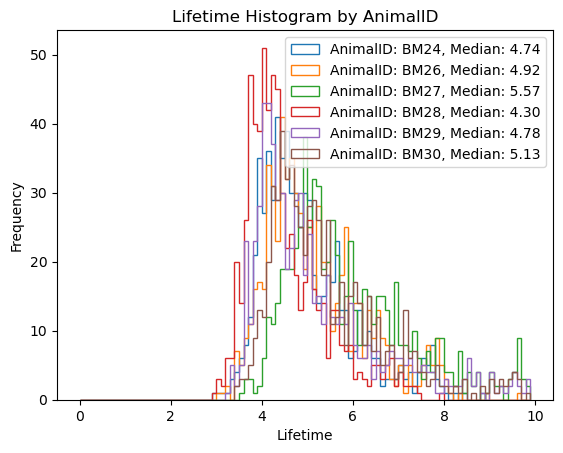

In [10]:
bins=np.arange(0, 10, 0.1)
for animal_id in Lifetime.columns:
    median_value = Lifetime[animal_id].median()
    short_name = id_to_shortname.get(animal_id, animal_id)
    plt.hist(Lifetime[animal_id].dropna(), bins=bins, alpha=1, 
             label=f'AnimalID: {short_name}, Median: {median_value:.2f}', 
             histtype='step')
    

plt.legend()
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.title('Lifetime Histogram by AnimalID')
plt.show()

In [11]:
median_values = Lifetime.median().rename('median').reset_index()
median_values.rename(columns={'index': 'AnimalID'}, inplace=True)

# Map AnimalID to ShortName using filtered_meta
median_values['animal'] = median_values['AnimalID'].map(id_to_shortname)
median_values.drop(columns=['AnimalID'], inplace=True)

# Merge the median values into fit_results_df based on the matching 'animal' (ShortName) column
fit_results_df = fit_results_df.merge(median_values, on='animal', how='left')

# Display or use fit_results_df with the added 'median' column
fit_results_df

,animal,window_size,slope_running_avg,intercept_running_avg,mean_running_avg,sum_running_avg,median
0,BM24,1,0.000530,0.359264,0.514480,302.0,4.743057
1,BM26,1,-0.000209,0.572326,0.537764,178.0,4.917183
2,BM27,1,-0.000005,0.504878,0.503436,293.0,5.570206
3,BM28,1,0.000138,0.422971,0.463866,276.0,4.299133
4,BM29,1,0.001587,0.233795,0.463918,135.0,4.779073
5,BM30,1,0.000593,0.297939,0.584281,565.0,5.125325


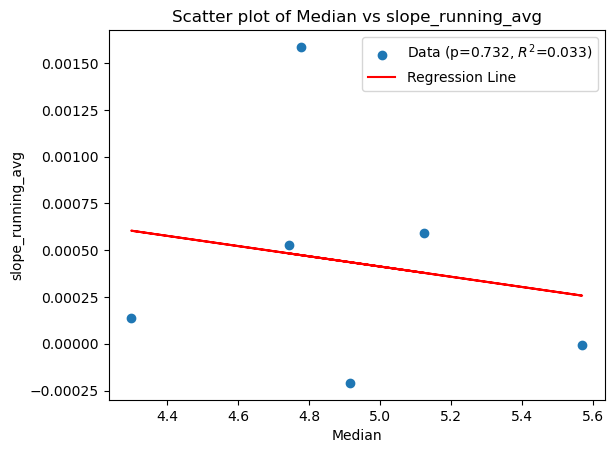

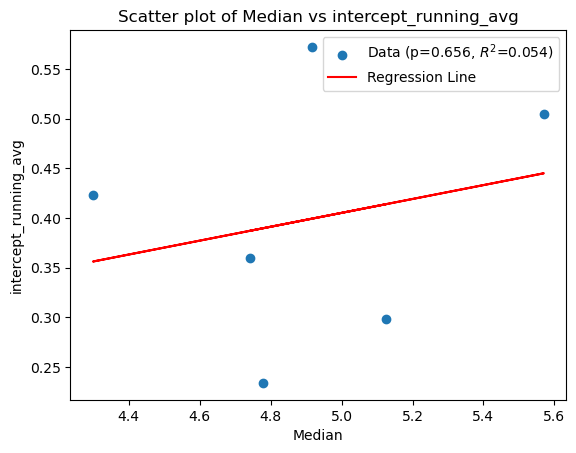

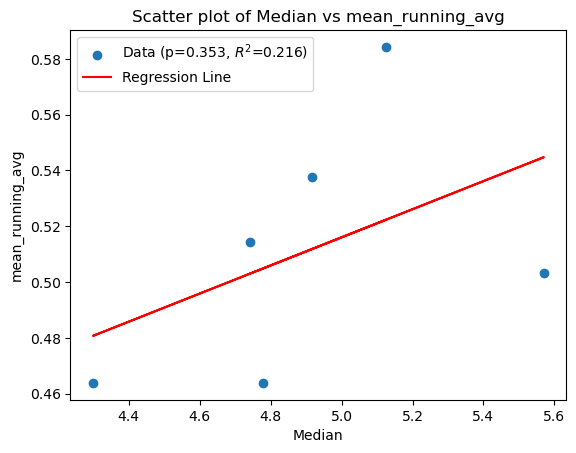

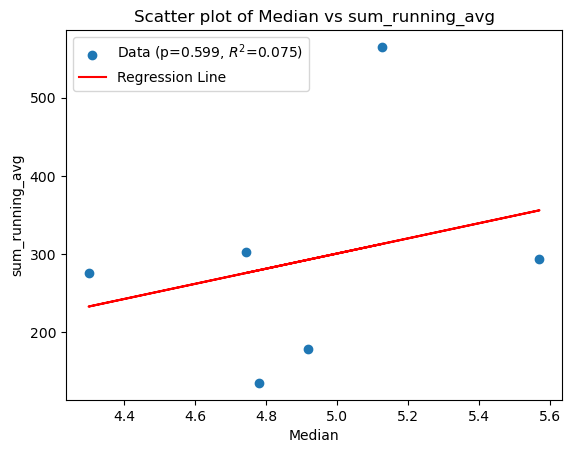

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the columns to plot against `median`
columns_to_plot = ['slope_running_avg', 'intercept_running_avg', 'mean_running_avg', 'sum_running_avg']

# Create scatter plots for each column against `median` with a regression line, R^2, and p-value
for column in columns_to_plot:
    x = fit_results_df['median']
    y = fit_results_df[column]
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Generate the regression line
    regression_line = slope * x + intercept
    
    # Plot the scatter plot and regression line
    plt.figure()
    plt.scatter(x, y, label=f'Data (p={p_value:.3f}, $R^2$={r_value**2:.3f})')
    plt.plot(x, regression_line, color='red', label='Regression Line')
    
    # Labeling
    plt.xlabel('Median')
    plt.ylabel(column)
    plt.title(f'Scatter plot of Median vs {column}')
    plt.legend()
    plt.show()


In [13]:
Lifetime.reset_index(inplace=True)

# Melt the DataFrame to long format
melted_df = Lifetime.melt(id_vars=['Region'], var_name='AnimalID', value_name='Lifetime')
stats_by_animal = melted_df.groupby('AnimalID')['Lifetime'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])


In [14]:
melted_df

,Region,AnimalID,Lifetime
0,1,550746,5.573999
1,2,550746,4.511029
2,6,550746,4.287109
3,7,550746,4.193059
4,9,550746,5.048440
...,...,...,...
4117,607344850,554459,5.317240
4118,607344854,554459,4.243688
4119,607344858,554459,4.784522
4120,607344862,554459,5.048032


In [15]:
stats_by_animal

,mean,median,std,min,max,count
AnimalID,,,,,,
550746,4.990644,4.743057,1.026667,2.948163,8.883035,687
550748,5.195430,4.917183,1.128392,3.015810,10.311863,687
552830,5.978474,5.570206,1.440612,3.579065,11.407816,687
553919,4.533674,4.299133,0.872652,2.973454,7.948574,687
553920,5.208526,4.779073,1.429987,3.251102,9.991057,687
554459,5.517601,5.125325,1.398384,3.416439,10.472645,687


In [16]:

melted_df['animal'] = melted_df['AnimalID'].map(id_to_shortname)
melted_df.drop(columns=['AnimalID'], inplace=True)

In [17]:
melted_df

,Region,Lifetime,animal
0,1,5.573999,BM24
1,2,4.511029,BM24
2,6,4.287109,BM24
3,7,4.193059,BM24
4,9,5.048440,BM24
...,...,...,...
4117,607344850,5.317240,BM30
4118,607344854,4.243688,BM30
4119,607344858,4.784522,BM30
4120,607344862,5.048032,BM30


In [18]:
fit_results_df

,animal,window_size,slope_running_avg,intercept_running_avg,mean_running_avg,sum_running_avg,median
0,BM24,1,0.000530,0.359264,0.514480,302.0,4.743057
1,BM26,1,-0.000209,0.572326,0.537764,178.0,4.917183
2,BM27,1,-0.000005,0.504878,0.503436,293.0,5.570206
3,BM28,1,0.000138,0.422971,0.463866,276.0,4.299133
4,BM29,1,0.001587,0.233795,0.463918,135.0,4.779073
5,BM30,1,0.000593,0.297939,0.584281,565.0,5.125325


In [19]:
lifetime_with_change = melted_df.merge(fit_results_df[['animal', 'slope_running_avg', 
                                                       'mean_running_avg','sum_running_avg',
                                                      'intercept_running_avg']], left_on='animal', right_on='animal', how='left')
lifetime_with_change

,Region,Lifetime,animal,slope_running_avg,mean_running_avg,sum_running_avg,intercept_running_avg
0,1,5.573999,BM24,0.000530,0.514480,302.0,0.359264
1,2,4.511029,BM24,0.000530,0.514480,302.0,0.359264
2,6,4.287109,BM24,0.000530,0.514480,302.0,0.359264
3,7,4.193059,BM24,0.000530,0.514480,302.0,0.359264
4,9,5.048440,BM24,0.000530,0.514480,302.0,0.359264
...,...,...,...,...,...,...,...
4117,607344850,5.317240,BM30,0.000593,0.584281,565.0,0.297939
4118,607344854,4.243688,BM30,0.000593,0.584281,565.0,0.297939
4119,607344858,4.784522,BM30,0.000593,0.584281,565.0,0.297939
4120,607344862,5.048032,BM30,0.000593,0.584281,565.0,0.297939


In [20]:
from scipy import stats

In [21]:
file_path = '../paramaters/Allen10.csv'
dataframe = pd.read_csv(file_path)
id_name_mapping = dict(zip(dataframe['id'], dataframe['name']))

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


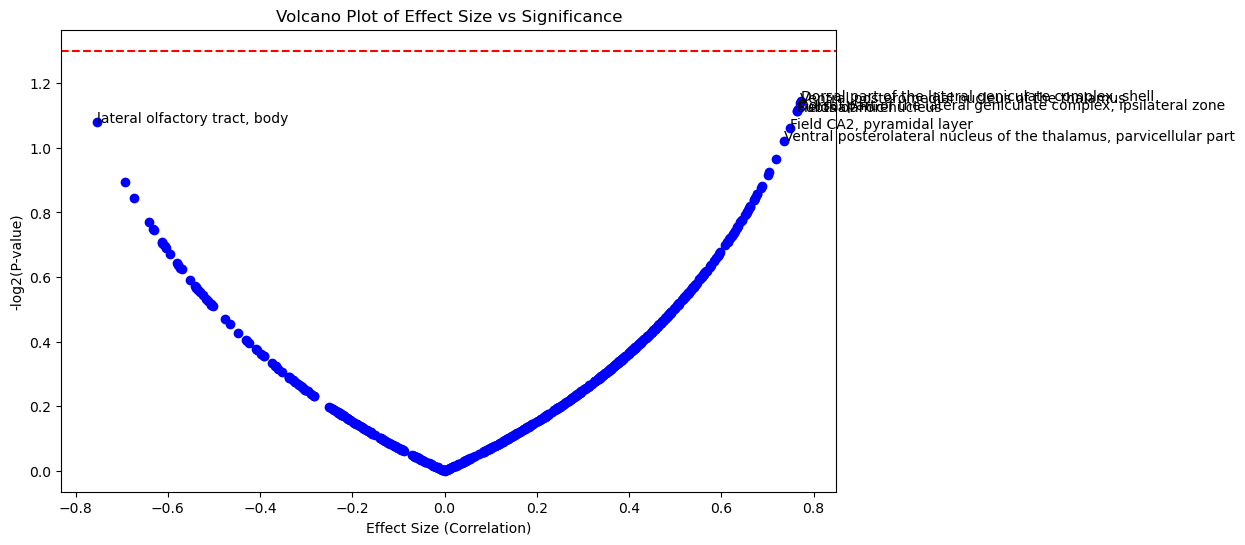

        Region                                        Region Name  \
231        446                         Field CA2, pyramidal layer   
243        470                                Subthalamic nucleus   
345        665                      lateral olfactory tract, body   
375        725  Ventral posterolateral nucleus of the thalamus...   
380        733      Ventral posteromedial nucleus of the thalamus   
414        804                                    Fields of Forel   
647  496345664  Dorsal part of the lateral geniculate complex,...   
649  496345672  Dorsal part of the lateral geniculate complex,...   

     Correlation   P-value  
231     0.748650  0.086825  
243     0.764268  0.076804  
345    -0.754263  0.083161  
375     0.736695  0.094867  
380     0.771441  0.072389  
414     0.764207  0.076843  
647     0.772934  0.071485  
649     0.765866  0.075811  


In [29]:
correlation_results = lifetime_with_change.groupby('Region').apply(
    lambda x: pd.Series(stats.pearsonr(x['Lifetime'], x['intercept_running_avg']))
).reset_index()
correlation_results.columns = ['Region', 'Correlation', 'P-value']

# Map region IDs to region names
correlation_results['Region Name'] = correlation_results['Region'].apply(lambda x: id_name_mapping[x])

significant_regions = correlation_results[correlation_results['P-value'] < 0.1]

# Create a volcano plot
plt.figure(figsize=(10, 6))
plt.scatter(correlation_results['Correlation'], -np.log10(correlation_results['P-value']), c='blue')
plt.xlabel('Effect Size (Correlation)')
plt.ylabel('-log2(P-value)')
plt.title('Volcano Plot of Effect Size vs Significance')
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--')  # Significance threshold line

# Annotate significant regions
for i, row in significant_regions.iterrows():
    plt.annotate(row['Region Name'], (row['Correlation'], -np.log10(row['P-value'])))

plt.show()

print(significant_regions[['Region', 'Region Name', 'Correlation', 'P-value']])

In [30]:
!bjobs

JOBID      USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
141942502  moharb  RUN   interactiv e02u30      4*h07u01    /bin/bash  Nov  5 13:20
141943154  moharb  RUN   local      e10u01      64*h06u03   *ANM557710 Nov  5 14:26


In [52]:
correlation_results

,Region,0,1
0,1,0.451677,0.368558
1,2,0.353235,0.492185
2,6,0.254666,0.626259
3,7,0.519047,0.291347
4,9,0.568881,0.238731
...,...,...,...
682,607344850,0.602384,0.205717
683,607344854,0.583914,0.223674
684,607344858,0.594836,0.212981
685,607344862,0.483766,0.330958
